Building a NN from scratch.

https://www.youtube.com/watch?v=w8yWXqWQYmU 


In a neural network, weights and biases are essential components used to learn and make predictions. They play a crucial role in determining the behavior of the network during training and inference.

**Weights:**

Weights are the parameters that the neural network learns from the training data. They are used to adjust the strength of connections between neurons in different layers of the network. Each weight represents the strength of a connection between two neurons. In a fully connected (dense) layer, there is a weight associated with each input feature for each neuron in the layer.

During training, the neural network learns optimal weight values through techniques like gradient descent. These weights are adjusted to minimize the difference between the network's predictions and the actual target values. Weight values are what allow the network to capture patterns and relationships in the data.

**Biases:**

Biases are another set of learnable parameters in a neural network. Each neuron in a layer has an associated bias term. Biases allow the network to introduce flexibility and offset in its predictions. They act as an intercept, allowing the network to fit the data more accurately.

In essence, biases allow the network to account for patterns that may not be completely captured by the weights alone. They help shift the activation function's output of each neuron, influencing the overall behavior of the layer.

Mathematically, weights and biases are combined with the input data and passed through an activation function in each neuron. The activation function's output is used as the input for the next layer in the network. This process is repeated across the layers of the neural network, allowing it to model complex relationships and make predictions.

In summary, weights and biases are the tunable parameters in a neural network that are adjusted during the training process. They determine how the network processes and interprets the input data, allowing it to make predictions or classify data into different categories. The choice of weight and bias values is what enables the network to learn and generalize from training data to make accurate predictions on new, unseen data.


**Problem statement:**

MNIST database. Classify handwritten digits using NN. 

Training data: 28x28 size = 784 pixels in each image. Each pixel is a value between 0-255 RGB 

Our NN will have a simple two-layer architecture. 

Input layer  **𝑎[0]** will have 784 units corresponding to the 784 pixels in each 28x28 input image. 

A hidden layer  **𝑎[1]** will have 10 units with ReLU activation, and finally our output layer.

**𝑎[2]** will have 10 units corresponding to the ten digit classes with softmax activation.

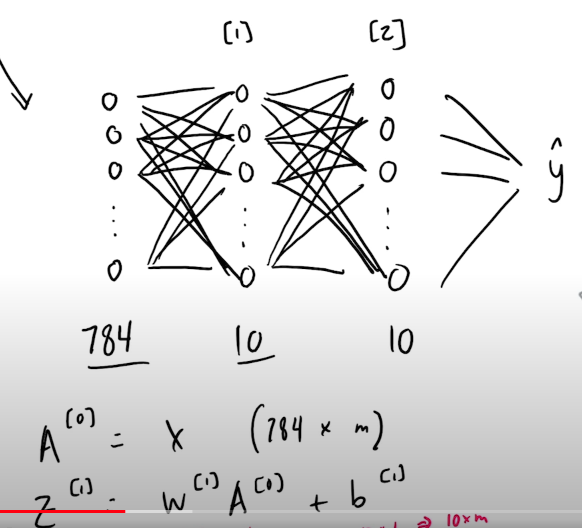

In [2]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

/Applications/Anaconda/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
os.getcwd()

'/Users/kevalshah/Keval_Backup/Startups/ML Research/LLMs'

In [18]:
train_data = pd.read_csv(os.getcwd() + "/mnist/mnist_train.csv")
m,n = train_data.shape

59999 785


In [30]:
# y_labels and x's training data
y_train = train_data.iloc[:,0].to_frame()
x_train = train_data.iloc[:,1:n]

"shape of y_train {} and x_train {}".format(y_train.shape, x_train.shape)

'shape of y_train (59999, 1) and x_train (59999, 784)'

In [31]:
test_data = pd.read_csv(os.getcwd() + "/mnist/mnist_test.csv")
test_data.shape

(9999, 785)

In [32]:
# y_labels and x's training data
y_test = test_data.iloc[:,0].to_frame()
x_test = test_data.iloc[:,1:n]

"shape of y_test {} and x_test {}".format(y_test.shape, x_test.shape)

'shape of y_test (9999, 1) and x_test (9999, 784)'

Our training dataset is **60,000** images with **784** columns for each of the 784 pixels. Each of the pixel or column represents a value between 0(black) and 255(white). 

In deep learning and machine learning, it is a common practice to represent image data in a specific format:

Data Shape: Images are typically represented as multi-dimensional arrays (tensors) where each dimension corresponds to a specific aspect of the data. In the case of 2D images, you often have a 3D tensor with dimensions representing (number of samples, height, width).

Channels: Color images usually have three channels (RGB), while grayscale images have a single channel. The number of channels is often the last dimension in the tensor.

In [51]:

def init_params():
    # Initialize the weights and biases of the neural network
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

# Linear function
def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

"""
Forward prop = takes the image and run it through the n/w to compute the output or prediction. 

X is the input layer, 1st layer
W1 is weights corresponding to each of the 784 x 10 nodes. 
b1 = constant bias term

Apply an activation function for non-linearity and powerful model performance. 

Z1 is unactivated input layer or hidden layer with ReLU activation function. 

W2 is weights corresponding to each of the 10 nodes in the hidden layer and b2 = constant bias term. 

Apply a softmax activation function for calculating the probabilities [0-1] for the output layer. 
"""

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2


"""
Prediction from forward_prop is not enough. 

We need to learn and adjust / optimize the weights and biases to make predictions. 

In backward_prop, we start with the prediction from forward_prop and calculate the error (i.e deviation from the actual label) and adjust 
the weights and biases. 

"""
def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    # encode predicted value to numpy array, so that we can do actual - predicted.  
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y # Actual - predicted
    dW2 = 1 / m * dZ2.dot(A1.T) # Derivative of loss function w.r.t weights in layer 2
    db2 = 1 / m * np.sum(dZ2) # Avg. of abs. error, accuracy between output layer / prediction and actual values
    """
    contribution of weights in the error, so that we can update the parameters. 
    """
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(self, W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = self.W1 - alpha * dW1
    b1 = self.b1 - alpha * db1    
    W2 = self.W2 - alpha * dW2  
    b2 = self.b2 - alpha * db2    
    return W1, b1, W2, b2

In [52]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [53]:
W1, b1, W2, b2 = gradient_descent(x_train, y_train, 0.10, 100)

ValueError: shapes (10,784) and (59999,784) not aligned: 784 (dim 1) != 59999 (dim 0)

In [ ]:

# Load the MNIST dataset
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

# Split the training set into training and validation sets
X_train, X_val = X_train[:50000], X_train[50000:]
Y_train, Y_val = Y_train[:50000], Y_train[50000:]

# Initialize the neural network
neural_network = NeuralNetwork(784, 128, 10)

# Train the neural network
neural_network.train(X_train, Y_train, epochs=100, learning_rate=0.01)

# Evaluate the neural network on the test set
accuracy = neural_network.evaluate(X_test, Y_test)

# Print the accuracy
print(accuracy)